In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from rich import print
from gfcat_utils import read_image, parse_exposure_time
from astropy.visualization import ZScaleInterval
from matplotlib.patches import Rectangle, Circle, Ellipse
from matplotlib.lines import Line2D
from matplotlib.text import Text
from lightcurve_interface_skeleton import screen_variables, load_lightcurve_records
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

### Examples of common artifacts --- hotspot, edge, and halo

/var/folders/pm/szdr5c1j3vz19xvrxpps_wfc0000gn/T/ipykernel_11137/3608852687.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


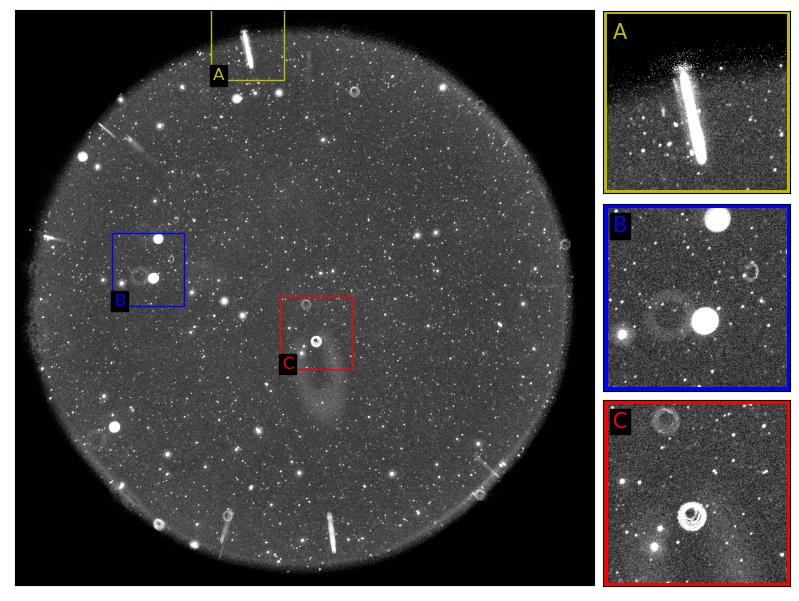

In [2]:
fn = '../data/e01516-nd-full.fits.gz'
imgmap, _, _, wcs, tranges, exptimes = read_image(fn)
imsz = np.shape(imgmap)[-2:]

gs = gridspec.GridSpec(nrows=3, ncols=4,
                      wspace=0.05, hspace=0.05)  # , height_ratios=[1, 1, 2])
fig = plt.figure(figsize=(4*2.5,3*2.5))
fig.tight_layout()
ax_main = fig.add_subplot(gs[:, :3])
ax_main.imshow(ZScaleInterval()(imgmap),origin="lower", cmap="Greys_r")
ax_main.set_xticks([]);ax_main.set_yticks([]);

boxsz = 200

x1_, x2_, y1_, y2_ = (max(int(imsz[0] / 2 - imsz[0] / 2), 0),
                      min(int(imsz[0] / 2 + imsz[0] / 2), imsz[0]),
                      max(int(imsz[1] / 2 - imsz[0] / 2), 0),
                      min(int(imsz[1] / 2 + imsz[0] / 2), imsz[1]))

imgx,imgy=1300,3000
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))
rect = Rectangle((y1 - y1_, x1 - x1_), 2 * boxsz, 2 * boxsz, linewidth=1, edgecolor='y', facecolor='none',                             ls='solid')
ax_main.add_patch(rect)
ax_main.text(y1, x1, 'A', color='y', fontsize=12,
       bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2})
ax = fig.add_subplot(gs[:1, 3:])
ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
ax.set_xticks([]);ax.set_yticks([]);
rect = Rectangle((0,0), y2-y1, x2-x1, linewidth=5, edgecolor='y', facecolor='none',
                             ls='solid')
ax.add_patch(rect)
ax.text(20, 330, 'A', color='y', fontsize=15,
       bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2})

imgx,imgy=750,1750
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))
rect = Rectangle((y1 - y1_, x1 - x1_), 2 * boxsz, 2 * boxsz, linewidth=1, edgecolor='b', facecolor='none',                             ls='solid')
ax_main.add_patch(rect)
ax_main.text(y1, x1, 'B', color='b', fontsize=12,
       bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2})
ax = fig.add_subplot(gs[1:2, 3:])
ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
ax.set_xticks([]);ax.set_yticks([]);
rect = Rectangle((0,0), y2-y1, x2-x1, linewidth=5, edgecolor='b', facecolor='none',
                             ls='solid')
ax.add_patch(rect)
ax.text(20, 340, 'B', color='b', fontsize=15,
       bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2})



imgx,imgy=1680,1400
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))
rect = Rectangle((y1 - y1_, x1 - x1_), 2 * boxsz, 2 * boxsz, linewidth=1, edgecolor='r', facecolor='none',                             ls='solid')
ax_main.add_patch(rect)
ax_main.text(y1, x1, 'C', color='r', fontsize=12,
       bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2})
ax = fig.add_subplot(gs[2:3, 3:])
ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
ax.set_xticks([]);ax.set_yticks([]);
rect = Rectangle((0,0), y2-y1, x2-x1, linewidth=5, edgecolor='r', facecolor='none',
                             ls='solid')
ax.add_patch(rect)
ax.text(20, 340, 'C', color='r', fontsize=15,
       bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2});


#ax = fig.add_subplot(gs[2:, :2])
#ax.plot(np.arange(10),np.arange(10)**2,'kx-')
#ax.set_xticks([]);ax.set_yticks([]);

plt.tight_layout()
plt.savefig('hotspot_edge_halo.pdf',dpi=150)
plt.savefig('hotspot_edge_halo.png',dpi=150)

This is the full-depth NUV image from eclipse 1516.

**A.** This region contains an "edge" or "dragon's breathe" artifact that is caused by the glint of a bright star just outside of the field of the detector field of view. Many such artifacts can be seen around the perimeter of particular observation. The intensity of these artifacts varies over time, along with the dither, as a function of the distance of the bright star from the edge of the field of view. This can easily generate signals that mimic many categories of astrophysical variability. These artifacts can extent quite far into the field of view, and so are not easily screened by use of the edge flag map.

**B.** This region contains a diffuse "halo" artifact caused by the light of a relatively bright star reflecting within the spacecraft structure. Upon careful examination, it is often possible to see the outline of the three trusses of the mirror assembly as shadows in the halo. Stars bright enough to generate halo artifacts are often also bright enough to induce non-linear behavior in the detector. Stars in close proximity to halo artifacts therefore often produce non-astrophysical time-varying signals, probalby through a combination of contamination from the wings of the bright star and local gain sag effects.

**C.** This region contains two active hotspots, characterized by a bright spiral pattern (tracing out the inverse path of the boresight dither). This region also contains part of a diffuse artifact that is due to the edge artifact identified in A; such artifacts can sometimes extend completely across the detector. Both hotspots and diffuse reflections can generate signals that mimic astrophysical variability. Hotspots can be identified programatically by using the hotspot flag map, which identifies pixels that contain photons that have fallen in a region of the detector covered by the mission-produced hotspot mask.

### Examples of common artifacts --- post-csp ghosts

/var/folders/pm/szdr5c1j3vz19xvrxpps_wfc0000gn/T/ipykernel_11137/2500722115.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


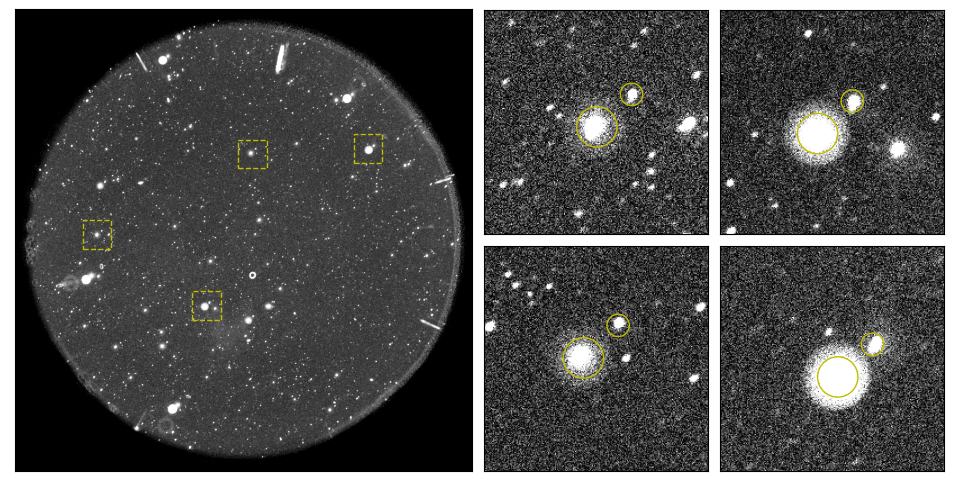

In [3]:
fn = '../data/e46548-nd-full.fits.gz'
imgmap, _, _, wcs, tranges, exptimes = read_image(fn)
imsz = np.shape(imgmap)[-2:]

gs = gridspec.GridSpec(nrows=2, ncols=4,
                      wspace=0.05, hspace=0.05)  # , height_ratios=[1, 1, 2])
fig = plt.figure(figsize=(12,6))
fig.tight_layout()
ax_main = fig.add_subplot(gs[:, :2])
ax_main.imshow(ZScaleInterval()(imgmap),origin="lower", cmap="Greys_r")
ax_main.set_xticks([]);ax_main.set_yticks([]);

boxsz = 100

x1_, x2_, y1_, y2_ = (max(int(imsz[0] / 2 - imsz[0] / 2), 0),
                      min(int(imsz[0] / 2 + imsz[0] / 2), imsz[0]),
                      max(int(imsz[1] / 2 - imsz[0] / 2), 0),
                      min(int(imsz[1] / 2 + imsz[0] / 2), imsz[1]))

# upper left
imgx,imgy=570,1640
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))
rect = Rectangle((y1 - y1_, x1 - x1_), 2 * boxsz, 2 * boxsz, linewidth=1, edgecolor='y', facecolor='none',ls='dashed')
ax_main.add_patch(rect)
ax = fig.add_subplot(gs[:1, 2:3])
ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
ax.set_xticks([]);ax.set_yticks([]);
x,y = 100,95
circ = Circle((x,y),18,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ)
xoffset,yoffset = 31,29
circ = Circle((x+xoffset,y+yoffset),10,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ)


# upper right
imgx,imgy=1330,1150
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))
rect = Rectangle((y1 - y1_, x1 - x1_), 2 * boxsz, 2 * boxsz, linewidth=1, edgecolor='y', facecolor='none',ls='dashed')
ax_main.add_patch(rect)
ax = fig.add_subplot(gs[:1, 3:])
ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
ax.set_xticks([]);ax.set_yticks([]);
x,y = 87,89
circ = Circle((x,y),18,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ)
xoffset,yoffset = 31,29
circ = Circle((x+xoffset,y+yoffset),10,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ)


# lower left
imgx,imgy=1650,2200
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))
rect = Rectangle((y1 - y1_, x1 - x1_), 2 * boxsz, 2 * boxsz, linewidth=1, edgecolor='y', facecolor='none',ls='dashed')
ax_main.add_patch(rect)
ax = fig.add_subplot(gs[1:, 2:3])
ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
ax.set_xticks([]);ax.set_yticks([]);
x,y = 88,100
circ = Circle((x,y),18,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ)
xoffset,yoffset = 31,29
circ = Circle((x+xoffset,y+yoffset),10,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ)


# lower right
imgx,imgy=2450,2240
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))
rect = Rectangle((y1 - y1_, x1 - x1_), 2 * boxsz, 2 * boxsz, linewidth=1, edgecolor='y', facecolor='none',ls='dashed')
ax_main.add_patch(rect)
ax = fig.add_subplot(gs[1:, 3:])
ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
ax.set_xticks([]);ax.set_yticks([]);
x,y = 105,83
circ = Circle((x,y),18,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ)
xoffset,yoffset = 31,29
circ = Circle((x+xoffset,y+yoffset),10,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(circ);

plt.tight_layout()
plt.savefig('post_csp_ghosts.pdf',dpi=150)
plt.savefig('post_csp_ghosts.png',dpi=150)

This is eclipse 46548. **A caption about post-CSP ghosts goes here.**

### Dither-synchronous light curves

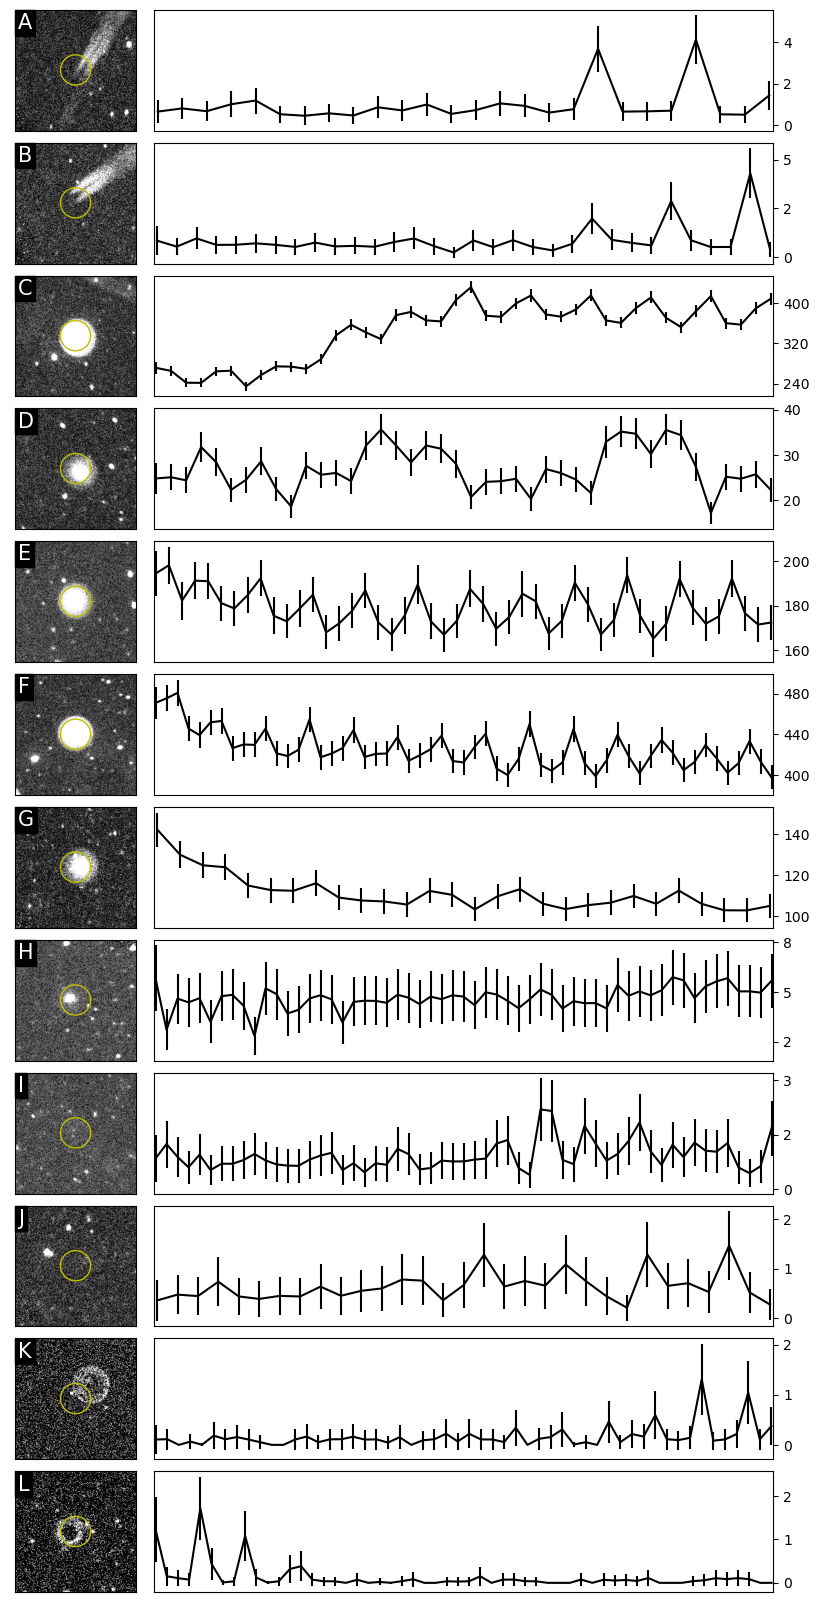

In [21]:
gs = gridspec.GridSpec(ncols=5, nrows=14,
                      wspace=0.01, hspace=0.1)
fig = plt.figure(figsize=(10,24))
fig.tight_layout()
#fig.set_ylabel('cps')
#fig.set_label_position("right")


for i,obj_id in enumerate(['2929418976','2614821446',
                           '2437212069','1562316490','2577319259','590308997',
                           '1798422263','349420405','308023437','2581821483',
                           '1151220036','1232020214', # these are FUV
                           #'147404281','1604204324', # move to specific graphic for FUV shadows
                          ]):
    e = obj_id[-5:]
    band = "NUV" if i<10 else "FUV"
    imgmap, _, _, wcs, tranges, exptimes = read_image(f'../data/e{e}-{band.lower()[0]}d-full.fits.gz')
    imsz = np.shape(imgmap)[-2:]
    lightcurves = load_lightcurve_records(f"../data/e{e}-30s-photom.parquet", band, apersize=12.8)
    expt = parse_exposure_time(f"../data/e{e}-30s-photom.parquet", band=band)
    
    for lc in lightcurves:
        if lc['obj_id']==int(obj_id):
            break
    
    imgpos = wcs.wcs_world2pix([[lc['ra'],lc['dec']]],1) # set the origin to FITS standard
    imgx,imgy = imgpos[0]
    
    boxsz = 100
    x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                      min(int(imgy + boxsz), imsz[0]),
                      max(int(imgx - boxsz), 0),
                      min(int(imgx + boxsz), imsz[1]))

    #if i<5:
    #    ax = fig.add_subplot(gs[i%5:i%5+1, 0:1])
    #else:
    #    ax = fig.add_subplot(gs[i%5:i%5+1, 5:6])
    ax = fig.add_subplot(gs[i:i+1, 0:1])
    ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
    circ = Circle((boxsz,boxsz),25,linewidth=1,edgecolor='y', facecolor='none')
    ax.add_patch(circ)
    ax.set_xticks([]);ax.set_yticks([]);
    ax.text(5, 168, 'ABCDEFGHIJKLMN'[i], color='white', fontsize=15,
           bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2});
    
    ax = fig.add_subplot(gs[i:i+1, 1:])
    t = expt['t0']
    ax.errorbar(t[:-1],lc['cps'][:-1],yerr=lc['cps_err'][:-1]*3,fmt='k')
    ax.set_xlim([min(t)-5,max(t[:-1])+5])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax.yaxis.set_major_locator(MaxNLocator(3)) 
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    if i==9:
        ax.set_yticks([0,1,2])
    ax.set_xticks([])
    #ax.set_yticks([]);

plt.tight_layout()
plt.savefig('dither_synchronous.pdf',dpi=150)
plt.savefig('dither_synchronous.png',dpi=150)

### Highlight the FUV shadow

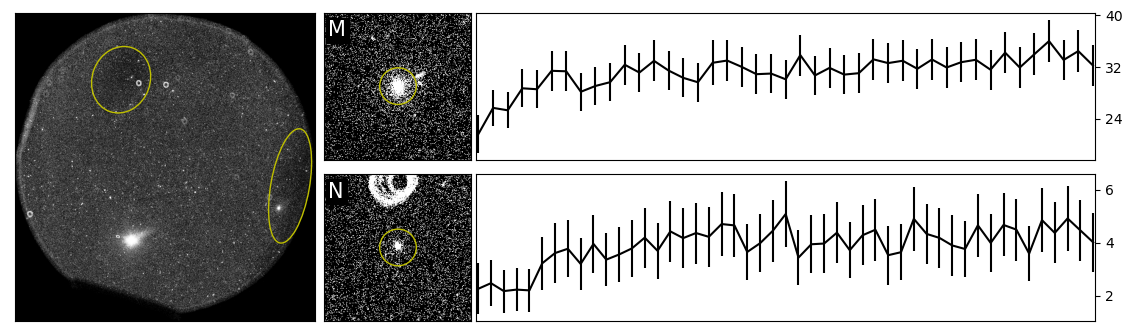

In [20]:
gs = gridspec.GridSpec(ncols=7, nrows=2,
                      wspace=0.01, hspace=0.1)
fig = plt.figure(figsize=(14,4))
fig.tight_layout()

ax = fig.add_subplot(gs[:,:2])
e = 19704
imgmap, _, _, wcs, tranges, exptimes = read_image(f'../data/e{e}-fd-full.fits.gz')
imsz = np.shape(imgmap)[-2:]

ax.imshow(ZScaleInterval()(imgmap), origin="lower", cmap="Greys_r")
ell = Ellipse((1100,2500),600,700,-20,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(ell)
ell = Ellipse((2850,1400),400,1200,-10,linewidth=1,edgecolor='y', facecolor='none')
ax.add_patch(ell)
ax.set_xticks([]);ax.set_yticks([]);

for i,obj_id in enumerate(['147404281','1604204324',]):
    e = obj_id[-5:]
    band = "FUV"
    imgmap, _, _, wcs, tranges, exptimes = read_image(f'../data/e{e}-{band.lower()[0]}d-full.fits.gz')
    imsz = np.shape(imgmap)[-2:]
    lightcurves = load_lightcurve_records(f"../data/e{e}-30s-photom.parquet", band, apersize=12.8)
    expt = parse_exposure_time(f"../data/e{e}-30s-photom.parquet", band=band)

    for lc in lightcurves:
        if lc['obj_id']==int(obj_id):
            break
    
    imgpos = wcs.wcs_world2pix([[lc['ra'],lc['dec']]],1) # set the origin to FITS standard
    imgx,imgy = imgpos[0]
    
    boxsz = 100
    x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                      min(int(imgy + boxsz), imsz[0]),
                      max(int(imgx - boxsz), 0),
                      min(int(imgx + boxsz), imsz[1]))

    #if i<5:
    #    ax = fig.add_subplot(gs[i%5:i%5+1, 0:1])
    #else:
    #    ax = fig.add_subplot(gs[i%5:i%5+1, 5:6])
    ax = fig.add_subplot(gs[i:i+1, 2:3])
    ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
    circ = Circle((boxsz,boxsz),25,linewidth=1,edgecolor='y', facecolor='none')
    ax.add_patch(circ)
    ax.set_xticks([]);ax.set_yticks([]);
    ax.text(5, 168, 'MN'[i], color='white', fontsize=15,
           bbox={'facecolor': 'black', 'alpha': 1, 'pad': 2});
    
    ax = fig.add_subplot(gs[i:i+1, 3:])
    t = expt['t0']
    ax.errorbar(t[:-1],lc['cps'][:-1],yerr=lc['cps_err'][:-1]*3,fmt='k')
    ax.set_xlim([min(t)-5,max(t[:-1])+5])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax.yaxis.set_major_locator(MaxNLocator(3)) 
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_xticks([])
    #ax.set_yticks([]);
plt.tight_layout()
plt.savefig('fuv_shadow.pdf',dpi=150)
plt.savefig('fuv_shadow.png',dpi=150)

### Aspect jump

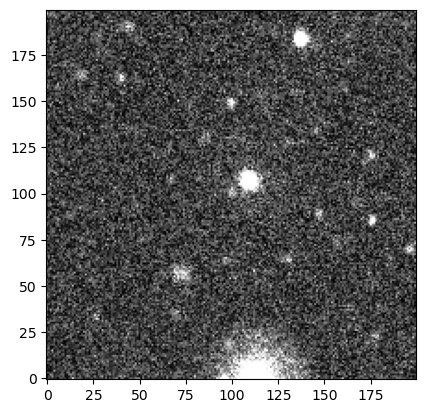

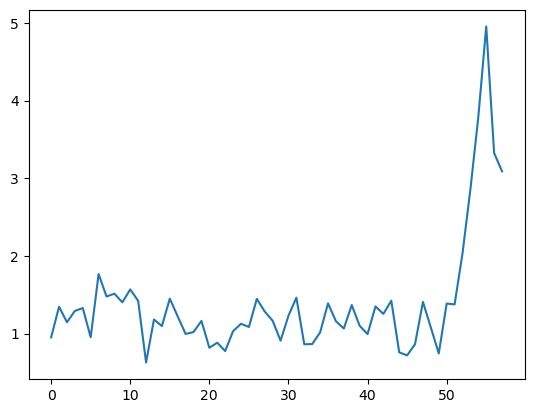

In [6]:
obj_id = '1273931633'
e = obj_id[-5:]
imgmap, _, _, wcs, tranges, exptimes = read_image(f'../data/e{e}-nd-full.fits.gz')
imsz = np.shape(imgmap)[-2:]
lightcurves = load_lightcurve_records(f"../data/e{e}-30s-photom.parquet", "NUV", apersize=12.8)
expt = parse_exposure_time(f"../data/e{e}-30s-photom.parquet", band="NUV")

for lc in lightcurves:
    if lc['obj_id']==int(obj_id):
        break

imgpos = wcs.wcs_world2pix([[lc['ra'],lc['dec']]],1) # set the origin to FITS standard
imgx,imgy = imgpos[0]

boxsz = 100
x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                  min(int(imgy + boxsz), imsz[0]),
                  max(int(imgx - boxsz), 0),
                  min(int(imgx + boxsz), imsz[1]))

plt.figure()
plt.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
plt.figure()
plt.plot(lc['cps'])

### Satellites (fast and slow)

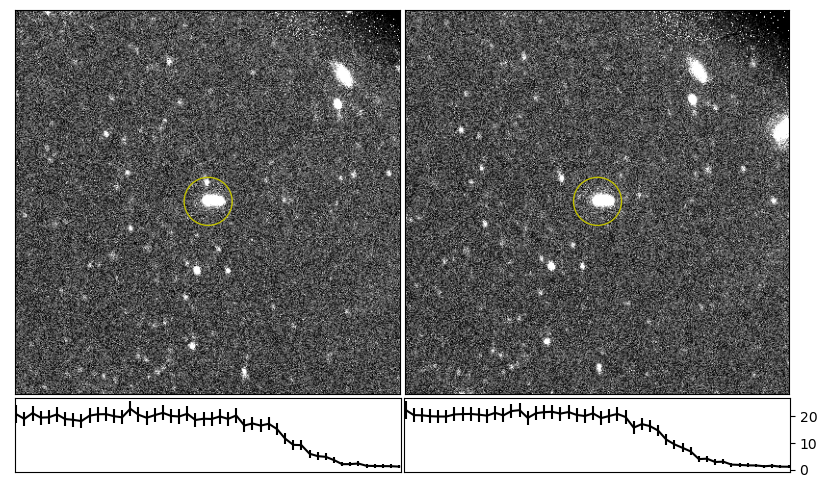

In [7]:
gs = gridspec.GridSpec(ncols=10, nrows=6,
                      wspace=0.05, hspace=0.05)  # , height_ratios=[1, 1, 2])
fig = plt.figure(figsize=(10,6))
fig.tight_layout()


for i,obj_id in enumerate(['385907958','361907959']):
    e = obj_id[-5:]
    imgmap, _, _, wcs, tranges, exptimes = read_image(f'../data/e{e}-nd-full.fits.gz')
    imsz = np.shape(imgmap)[-2:]
    lightcurves = load_lightcurve_records(f"../data/e{e}-30s-photom.parquet", "NUV", apersize=12.8)
    expt = parse_exposure_time(f"../data/e{e}-30s-photom.parquet", band="NUV")

    for lc in lightcurves:
        if lc['obj_id']==int(obj_id):
            break        

    if i==0:
        ax = fig.add_subplot(gs[:5, :5])
    elif i==1:
        ax = fig.add_subplot(gs[:5, 5:])

    imgpos = wcs.wcs_world2pix([[lc['ra'],lc['dec']]],1) # set the origin to FITS standard
    imgx,imgy = imgpos[0]

    boxsz = 200
    x1, x2, y1, y2 = (max(int(imgy - boxsz), 0),
                      min(int(imgy + boxsz), imsz[0]),
                      max(int(imgx - boxsz), 0),
                      min(int(imgx + boxsz), imsz[1]))

    ax.imshow(ZScaleInterval()(imgmap[x1:x2, y1:y2]), origin="lower", cmap="Greys_r")
    ax.set_xticks([]);ax.set_yticks([]);
    circ = Circle((boxsz,boxsz),25,linewidth=1,edgecolor='y', facecolor='none')
    ax.add_patch(circ)

    if i==0:
        ax = fig.add_subplot(gs[5:, :5])
        ax.set_yticks([])
    elif i==1:
        ax = fig.add_subplot(gs[5:, 5:])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
        ax.yaxis.set_major_locator(MaxNLocator(3)) 
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
    t = expt['t0']
    ax.errorbar(t[:-1],lc['cps'][:-1],yerr=lc['cps_err'][:-1]*3,fmt='k')
    ax.set_xlim([min(t)-5,max(t[:-1])+5])
    ax.set_xticks([]);

plt.tight_layout()
plt.savefig('slow_moving_object.pdf',dpi=150)
plt.savefig('slow_moving_object.png',dpi=150)

In [8]:
obj_id = '361907959'
e = obj_id[-5:]
movmap, _, _, wcs, tranges, exptimes = read_image(f'../data/e{e}-nd-30s.fits.gz')
imsz = np.shape(movmap)[-2:]

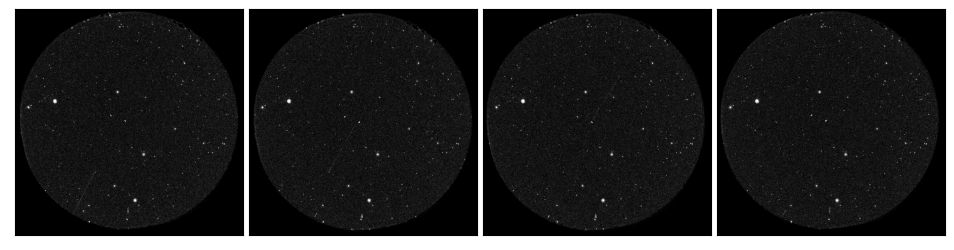

In [9]:
gs = gridspec.GridSpec(ncols=8, nrows=2,
                      wspace=0.05, hspace=0.05)  # , height_ratios=[1, 1, 2])
fig = plt.figure(figsize=(12,3))
fig.tight_layout()

for i,j in enumerate([2,3,4,5]):
    ax = fig.add_subplot(gs[:,i*2:i*2+2])
    ax.imshow((ZScaleInterval()(movmap[j])), origin="lower", cmap="Greys_r")
    ax.set_xticks([]);ax.set_yticks([])